# LOGISTIC REGRESSION

# 1. Importing packages and data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spill-data/Spill_Data/Train/NoSpill_031.jpg
/kaggle/input/spill-data/Spill_Data/Train/Oilspill_032.jpg
/kaggle/input/spill-data/Spill_Data/Train/NoSpill_008.jpg
/kaggle/input/spill-data/Spill_Data/Train/NoSpill_065.jpg
/kaggle/input/spill-data/Spill_Data/Train/Oilspill_044.jpg
/kaggle/input/spill-data/Spill_Data/Train/Oilspill_038.jpg
/kaggle/input/spill-data/Spill_Data/Train/Oilspill_098.jpg
/kaggle/input/spill-data/Spill_Data/Train/NoSpill_033.jpg
/kaggle/input/spill-data/Spill_Data/Train/NoSpill_234.jpg
/kaggle/input/spill-data/Spill_Data/Train/Oilspill_079.jpg
/kaggle/input/spill-data/Spill_Data/Train/Oilspill_124.jpg
/kaggle/input/spill-data/Spill_Data/Train/Oilspill_043.jpg
/kaggle/input/spill-data/Spill_Data/Train/NoSpill_187.jpg
/kaggle/input/spill-data/Spill_Data/Train/NoSpill_061.jpg
/kaggle/input/spill-data/Spill_Data/Train/NoSpill_046.jpg
/kaggle/input/spill-data/Spill_Data/Train/NoSpill_192.jpg
/kaggle/input/spill-data/Spill_Data/Train/NoSpill_095.jpg
/kaggle

# 2. Data preprocessing

In [2]:
folder1 = "/kaggle/input/spill-data/spill_data/Spill_Data/Test"

onlyfiles1 = [f for f in os.listdir(folder1) if os.path.isfile(os.path.join(folder1, f))]

print("Working with {0} images".format(len(onlyfiles1)))

Working with 112 images


In [3]:
folder2 = "/kaggle/input/spill-data/spill_data/Spill_Data/Train"

onlyfiles2 = [f for f in os.listdir(folder2) if os.path.isfile(os.path.join(folder2, f))]

print("Working with {0} images".format(len(onlyfiles2)))

Working with 300 images


In [4]:
data=[]
data=onlyfiles1+onlyfiles2
print(len(data))

412


In [5]:
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

train_files = []
y_train = []
i=0
for _file in onlyfiles2:
    train_files.append(_file)
    if (_file.find("NoSpill_")):
        label_in_file =0
        y_train.append(label_in_file)
    else:
        label_in_file= 1
        y_train.append(label_in_file)
    
print("Files in data: %d" % len(onlyfiles2))

Files in data: 300


In [6]:
print(y_train)

[1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0]


In [7]:
print(train_files)

['NoSpill_031.jpg', 'Oilspill_032.jpg', 'NoSpill_008.jpg', 'NoSpill_065.jpg', 'Oilspill_044.jpg', 'Oilspill_038.jpg', 'Oilspill_098.jpg', 'NoSpill_033.jpg', 'NoSpill_234.jpg', 'Oilspill_079.jpg', 'Oilspill_124.jpg', 'Oilspill_043.jpg', 'NoSpill_187.jpg', 'NoSpill_061.jpg', 'NoSpill_046.jpg', 'NoSpill_192.jpg', 'NoSpill_095.jpg', 'Oilspill_016.jpg', 'NoSpill_068.jpg', 'Oilspill_006.jpg', 'Oilspill_069.jpg', 'NoSpill_060.jpg', 'NoSpill_139.jpg', 'Oilspill_101.jpg', 'Oilspill_225.jpg', 'NoSpill_103.jpg', 'Oilspill_051.jpg', 'Oilspill_153.jpg', 'NoSpill_144.jpg', 'NoSpill_093.jpg', 'Oilspill_202.jpg', 'NoSpill_007.jpg', 'Oilspill_122.jpg', 'NoSpill_009.jpg', 'NoSpill_072.jpg', 'Oilspill_055.jpg', 'NoSpill_024.jpg', 'NoSpill_017.jpg', 'Oilspill_200.jpg', 'Oilspill_005.jpg', 'Oilspill_070.jpg', 'Oilspill_081.jpg', 'NoSpill_042.jpg', 'NoSpill_143.jpg', 'Oilspill_168.jpg', 'Oilspill_003.jpg', 'Oilspill_042.jpg', 'NoSpill_016.jpg', 'Oilspill_107.jpg', 'Oilspill_072.jpg', 'NoSpill_227.jpg', 'NoS

In [8]:
test_files = []
y_test = []
i=0
for _file in onlyfiles1:
    test_files.append(_file)
    if (_file.find("NoSpill_")):
        label_in_file =0
        y_test.append(label_in_file)
    else:
        label_in_file= 1
        y_test.append(label_in_file)
    
print("Files in data: %d" % len(onlyfiles1))

Files in data: 112


In [9]:
print(y_test)

[1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0]


In [10]:
print(test_files)

['NoSpill_031.jpg', 'NoSpill_008.jpg', 'Oilspill_098.jpg', 'NoSpill_033.jpg', 'NoSpill_036.jpg', 'Oilspill_124.jpg', 'Oilspill_131.jpg', 'NoSpill_046.jpg', 'Oilspill_116.jpg', 'Oilspill_101.jpg', 'Oilspill_150.jpg', 'NoSpill_001.jpg', 'NoSpill_007.jpg', 'Oilspill_122.jpg', 'NoSpill_009.jpg', 'NoSpill_017.jpg', 'Oilspill_081.jpg', 'NoSpill_042.jpg', 'NoSpill_016.jpg', 'Oilspill_107.jpg', 'Oilspill_087.jpg', 'NoSpill_048.jpg', 'Oilspill_132.jpg', 'Oilspill_137.jpg', 'NoSpill_006.jpg', 'Oilspill_091.jpg', 'Oilspill_126.jpg', 'Oilspill_141.jpg', 'Oilspill_103.jpg', 'Oilspill_140.jpg', 'Oilspill_119.jpg', 'Oilspill_129.jpg', 'Oilspill_099.jpg', 'NoSpill_034.jpg', 'NoSpill_041.jpg', 'NoSpill_028.jpg', 'NoSpill_039.jpg', 'Oilspill_113.jpg', 'NoSpill_014.jpg', 'Oilspill_144.jpg', 'Oilspill_108.jpg', 'Oilspill_095.jpg', 'Oilspill_104.jpg', 'Oilspill_118.jpg', 'NoSpill_010.jpg', 'Oilspill_088.jpg', 'NoSpill_043.jpg', 'Oilspill_147.jpg', 'Oilspill_096.jpg', 'NoSpill_040.jpg', 'Oilspill_117.jpg', 

In [11]:
from PIL import Image
# Open the image form working directory
image = Image.open('/kaggle/input/spill-data/spill_data/Spill_Data/Test/NoSpill_008.jpg')
print(image.mode)

RGB


In [12]:
from PIL import Image
from numpy import asarray

for _file in train_files:
    image = Image.open(folder2 + "/" + _file)
    new_image = image.resize((300, 300))
    new_image.save('1'+_file)
   # print(new_image.size)
for _file in test_files:
    image = Image.open(folder1 + "/" + _file)
    new_image = image.resize((300, 300))
    new_image.save(_file)
    #print(new_image.size)    
   


In [13]:
# Original Dimensions
image_width = 300
image_height = 300
ratio = 3


channels = 3


dataset2 = np.ndarray(shape=(len(train_files), image_height, image_width,channels))
from PIL import Image
from numpy import asarray
i = 0
for _file in train_files:
    image = Image.open(folder2 + "/" + _file)
    new_image = image.resize((300, 300))
    new_image.save('2'+_file)
    dataa = asarray(new_image)
    x = dataa  
    # Normalize
    x = (x - 128.0) / 128.0
    dataset2[i] = x
    i += 1
    
print("All images to array!")
print(len(dataset2))

All images to array!
300


In [14]:
# Original Dimensions
image_width = 300
image_height = 300
ratio = 3


channels = 3


dataset1 = np.ndarray(shape=(len(test_files), image_height, image_width,channels))
from PIL import Image
from numpy import asarray
i = 0
for _file in test_files:
    image = Image.open(folder1 + "/" + _file)
    new_image = image.resize((300, 300))
    new_image.save('1'+_file)
    dataa = asarray(new_image)
    x = dataa  
    # Normalize
    x = (x - 128.0) / 128.0
    dataset1[i] = x
    i += 1
    
print("All images to array!")
print(len(dataset1))


All images to array!
112


# 3. Overview of problem set

In [15]:
print(dataset1.shape)
y__test=np.array(y_test)
y__test=y__test.reshape(-1, len(y__test))
y__test.shape

(112, 300, 300, 3)


(1, 112)

In [16]:
print(dataset2.shape)
y__train=np.array(y_train)
y__train=y__train.reshape(-1, len(y__train))
y__train.shape

(300, 300, 300, 3)


(1, 300)

In [17]:
train_set_x_flatten = dataset2.reshape(dataset2.shape[0], -1).T
test_set_x_flatten = dataset1.reshape(dataset1.shape[0], -1).T 
 
print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(y__train.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(y__test.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (270000, 300)
train_set_y shape: (1, 300)
test_set_x_flatten shape: (270000, 112)
test_set_y shape: (1, 112)
sanity check after reshaping: [0.859375  0.703125  0.6171875 0.859375  0.703125 ]


In [18]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

# 4.Building the parts of our algorithm

# 4.1 Helper functions

In [19]:
# GRADED FUNCTION: sigmoid

def sigmoid(z):
    

    ### START CODE HERE ### (≈ 1 line of code)
    s = 1/(1+np.exp(-z))
    ### END CODE HERE ###
    
    return s


In [20]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


# 4.2 Initializing parameters

In [21]:
# GRADED FUNCTION: initialize_with_zeros

def initialize_with_zeros(dim):
   
    ### START CODE HERE ### (≈ 1 line of code)
    w = np.zeros((dim,1))
    b = 0
    ### END CODE HERE ###

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [22]:
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0


# 4.3  Forward and Backward propagation

In [23]:
# GRADED FUNCTION: propagate

def propagate(w, b, X, Y):
   
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    ### START CODE HERE ### (≈ 2 lines of code)
    A = sigmoid(np.dot(w.T,X)+b)        # Dimention = (1,m)    # compute activation 
    
    ### WORKING SOLUTION: 1 ###
    cost = (-1 / m) * np.sum( Y * np.log(A) + (1-Y) * np.log(1-A) )  # Dimention = Scalar  # compute cost
    
    ### WORKING SOLUTION: 2 ###
    #cost = (-1/m)*(np.dot(Y,(np.log(A)).T)+(np.dot((1-Y),(np.log(1-A)).T)))   # Dimention = Scalar  # compute cost
    
    ### END CODE HERE ###
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    ### START CODE HERE ### (≈ 2 lines of code)
    dw = (1 / m) * np.dot(X, (A - Y).T)       # Dimention = (num_px * num_px * 3, 1)
    db = (1 / m) * np.sum(A - Y)              # Dimention = Scalar 
    ### END CODE HERE ###

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost


In [24]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


# 4.4  Optimization

In [25]:
# GRADED FUNCTION: optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
   
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation (≈ 1-4 lines of code)
        ### START CODE HERE ### 
        grads, cost = propagate(w, b, X, Y)
        ### END CODE HERE ###
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        ### START CODE HERE ###
        w = w - (learning_rate * dw)
        b = b - (learning_rate * db)
        ### END CODE HERE ###
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs


In [26]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042]
 [1.41625495]]
db = 0.21919450454067652


In [27]:
# GRADED FUNCTION: predict

def predict(w, b, X):
    
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    ### START CODE HERE ### (≈ 1 line of code)
    A = sigmoid(np.dot(w.T,X) + b)           # Dimentions = (1, m)
    ### END CODE HERE ###
    
    #### WORKING SOLUTION 1: USING IF ELSE #### 
    #for i in range(A.shape[1]):
        ## Convert probabilities A[0,i] to actual predictions p[0,i]
        ### START CODE HERE ### (≈ 4 lines of code)
        #if (A[0,i] >= 0.5):
        #    Y_prediction[0, i] = 1
        #else:
        #    Y_prediction[0, i] = 0
        ### END CODE HERE ###
        
    #### WORKING SOLUTION 2: ONE LINE ####
    #for i in range(A.shape[1]):
        ## Convert probabilities A[0,i] to actual predictions p[0,i]
        ### START CODE HERE ### (≈ 4 lines of code)
        #Y_prediction[0, i] = 1 if A[0,i] >=0.5 else 0
        ### END CODE HERE ###
    
    #### WORKING SOLUTION 3: VECTORISED IMPLEMENTATION ####
    Y_prediction = (A >= 0.5) * 1.0
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [28]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]


# 5 - Merge all functions into a model

In [37]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.1, print_cost = False):
   
    
    ### START CODE HERE ###
    
    # initialize parameters with zeros (≈ 1 line of code)
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    ### END CODE HERE ###

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [38]:
d = model(train_set_x, y__train, test_set_x,y__test, num_iterations = 2000, learning_rate = 0.1, print_cost = True)


Cost after iteration 0: 0.693147
Cost after iteration 100: 0.602781
Cost after iteration 200: 0.559596
Cost after iteration 300: 0.531743
Cost after iteration 400: 0.510611
Cost after iteration 500: 0.493062
Cost after iteration 600: 0.477773
Cost after iteration 700: 0.464101
Cost after iteration 800: 0.451686
Cost after iteration 900: 0.440302
Cost after iteration 1000: 0.429789
Cost after iteration 1100: 0.420030
Cost after iteration 1200: 0.410930
Cost after iteration 1300: 0.402413
Cost after iteration 1400: 0.394416
Cost after iteration 1500: 0.386884
Cost after iteration 1600: 0.379772
Cost after iteration 1700: 0.373041
Cost after iteration 1800: 0.366655
Cost after iteration 1900: 0.360585
train accuracy: 89.33333333333333 %
test accuracy: 91.96428571428571 %


In [31]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.01, print_cost = False):
    
    
    ### START CODE HERE ###
    
    # initialize parameters with zeros (≈ 1 line of code)
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    ### END CODE HERE ###

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [32]:
d = model(train_set_x, y__train, test_set_x,y__test, num_iterations = 2000, learning_rate = 0.01, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.678765
Cost after iteration 200: 0.666478
Cost after iteration 300: 0.655690
Cost after iteration 400: 0.646037
Cost after iteration 500: 0.637287
Cost after iteration 600: 0.629285
Cost after iteration 700: 0.621918
Cost after iteration 800: 0.615103
Cost after iteration 900: 0.608772
Cost after iteration 1000: 0.602871
Cost after iteration 1100: 0.597352
Cost after iteration 1200: 0.592176
Cost after iteration 1300: 0.587307
Cost after iteration 1400: 0.582716
Cost after iteration 1500: 0.578374
Cost after iteration 1600: 0.574258
Cost after iteration 1700: 0.570347
Cost after iteration 1800: 0.566623
Cost after iteration 1900: 0.563067
train accuracy: 76.33333333333333 %
test accuracy: 77.67857142857143 %


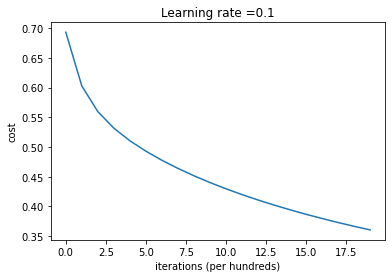

In [39]:
import matplotlib.pyplot as plt
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

# 6 - Further analysis

learning rate is: 0.1
train accuracy: 87.33333333333333 %
test accuracy: 91.07142857142857 %

-------------------------------------------------------

learning rate is: 0.01
train accuracy: 76.0 %
test accuracy: 76.78571428571428 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 67.66666666666667 %
test accuracy: 72.32142857142857 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 62.0 %
test accuracy: 64.28571428571428 %

-------------------------------------------------------



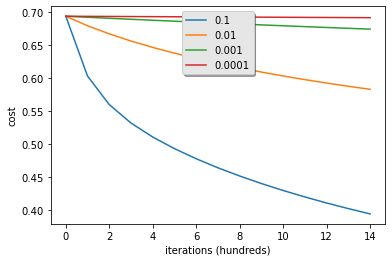

In [35]:
learning_rates = [0.1,0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x,y__train, test_set_x,y__test, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()